In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

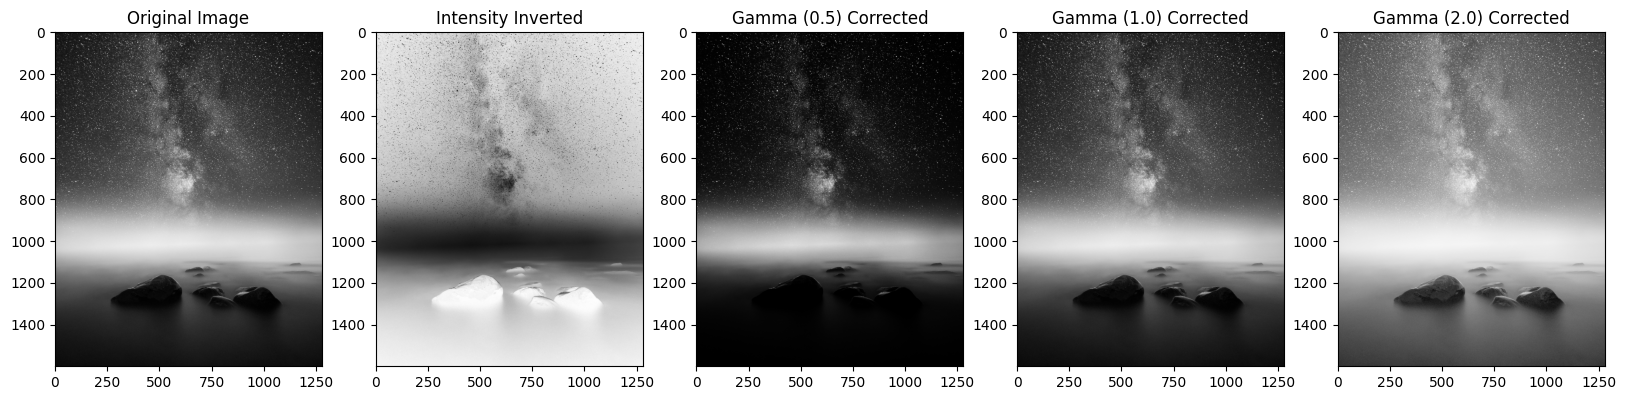

In [12]:
### Brightness Alternation ###
def intensity_inversion(image):
    # inverts the pixel values, meaning that dark pixels become bright and bright pixels become dark.
    return cv2.bitwise_not(image)

def gamma_correction(image, gamma=2.2):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

image = cv2.imread("image1.jpg")  # Replace with the uploaded file name
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
inverted = intensity_inversion(image_gray)
gamma_corrected_0 = gamma_correction(image_gray, gamma=0.5)
gamma_corrected_1 = gamma_correction(image_gray, gamma=1)
gamma_corrected_2 = gamma_correction(image_gray, gamma=2)

# Display Results
fig, ax = plt.subplots(1, 5, figsize=(20, 15))
ax[0].imshow(image_gray, cmap='gray'); ax[0].set_title("Original Image")
ax[1].imshow(inverted, cmap='gray'); ax[1].set_title("Intensity Inverted")
ax[2].imshow(gamma_corrected_0, cmap='gray'); ax[2].set_title("Gamma (0.5) Corrected")
ax[3].imshow(gamma_corrected_1, cmap='gray'); ax[3].set_title("Gamma (1.0) Corrected")
ax[4].imshow(gamma_corrected_2, cmap='gray'); ax[4].set_title("Gamma (2.0) Corrected")
plt.show()

#Reference: https://pyimagesearch.com/2015/10/05/opencv-gamma-correction/

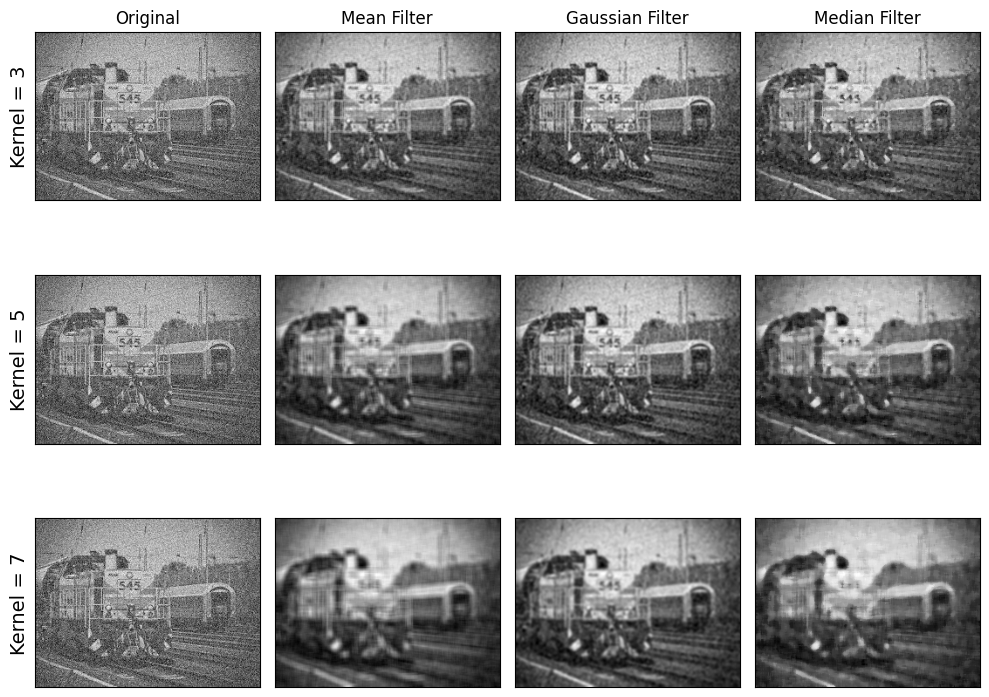

In [27]:
### Noise Reduction ###

# Function to apply different filters
def apply_filtering(img, kernel_size):
    mean_filtered = cv2.blur(img, (kernel_size, kernel_size))  # Mean filter
    gaussian_filtered = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)  # Gaussian filter
    median_filtered = cv2.medianBlur(img, kernel_size)  # Median filter
    return mean_filtered, gaussian_filtered, median_filtered

# Load the noisy image (Change 'noisy_image.jpg' to your actual file)
image = cv2.imread("image2.jpeg", cv2.IMREAD_GRAYSCALE)

# Define kernel sizes to test
kernel_sizes = [3, 5, 7]

# Create figure for visualization
fig, axes = plt.subplots(3, 4, figsize=(10, 8))

# Titles for each column
titles = ["Original", "Mean Filter", "Gaussian Filter", "Median Filter"]

# Apply filters and plot images
for i, kernel_size in enumerate(kernel_sizes):
    mean_filtered, gaussian_filtered, median_filtered = apply_filtering(image, kernel_size)

    # Display images
    axes[i, 0].imshow(image, cmap='gray')
    axes[i, 1].imshow(mean_filtered, cmap='gray')
    axes[i, 2].imshow(gaussian_filtered, cmap='gray')
    axes[i, 3].imshow(median_filtered, cmap='gray')

    # Set column titles only for the first row
    if i == 0:
        for j in range(4):
            axes[i, j].set_title(titles[j], fontsize=12)

    # ✅ Set y-axis label for each row
    axes[i, 0].set_ylabel(f"Kernel = {kernel_size}", fontsize=14)

    # ✅ Only remove x/y ticks, not labels
    for j in range(4):
        axes[i, j].set_xticks([])  # Hide x-axis ticks
        axes[i, j].set_yticks([])  # Hide y-axis ticks

plt.tight_layout()
plt.show()

# Reference: https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/

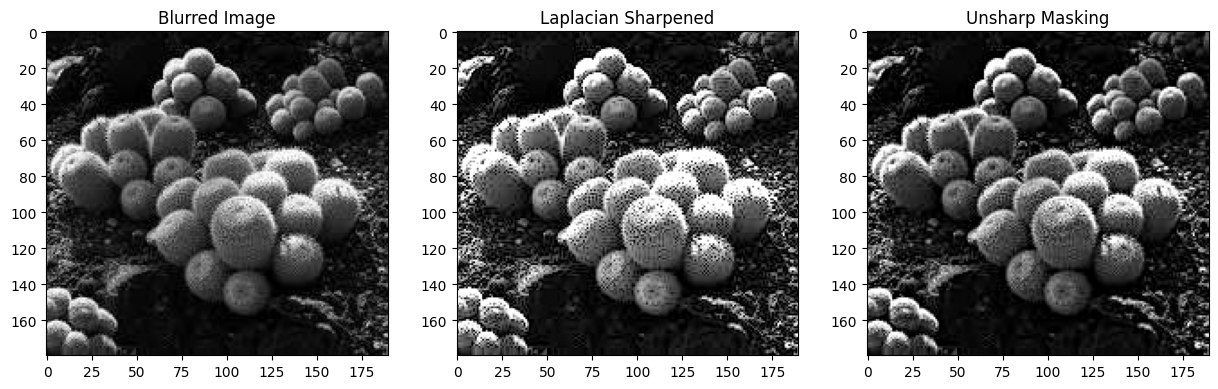

In [33]:
### Image Sharpening ###
def sharpen_laplacian(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = np.clip(laplacian, 0, 255).astype(np.uint8)
    sharpened = cv2.addWeighted(image, 1.5, laplacian, -0.0, 0)
    return sharpened

def sharpen_unsharp_mask(image):
    gaussian_blur = cv2.GaussianBlur(image, (9,9), 10)
    sharpened = cv2.addWeighted(image, 1.5, gaussian_blur, -0.5, 0)
    return sharpened

blurred_image = cv2.imread("image3.jpeg", cv2.IMREAD_GRAYSCALE)
laplacian_sharp = sharpen_laplacian(blurred_image)
unsharp_sharp = sharpen_unsharp_mask(blurred_image)

# Display Results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(blurred_image, cmap='gray'); ax[0].set_title("Blurred Image")
ax[1].imshow(laplacian_sharp, cmap='gray'); ax[1].set_title("Laplacian Sharpened")
ax[2].imshow(unsharp_sharp, cmap='gray'); ax[2].set_title("Unsharp Masking")
plt.show()
